<a href="https://colab.research.google.com/github/LNshuti/eactrade/blob/main/ec_trade_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install networkx --quiet

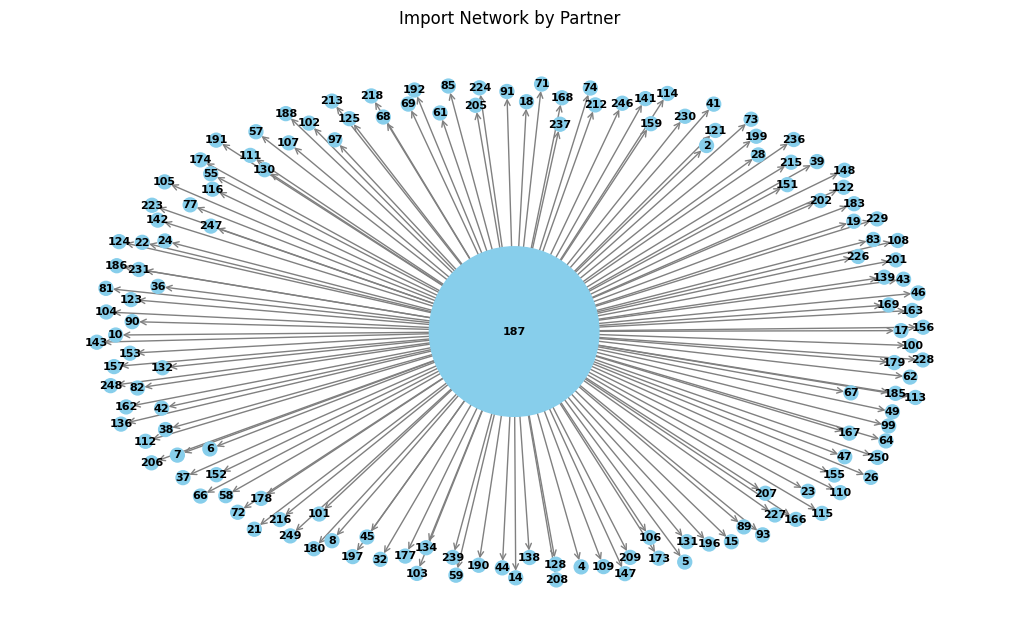

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load your data (replace with the actual path)
df = pd.read_csv('/content/rwa_sum_features.csv')

# Create a directed graph
G = nx.from_pandas_edgelist(df, 'location_id', 'partner_id', edge_attr='imports', create_using=nx.DiGraph())

# Plot the network
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=[v * 100 for v in dict(G.degree()).values()],
        node_color='skyblue', font_size=8, font_weight='bold',
        arrowsize=10, arrowstyle='->', edge_color='gray')
plt.title('Import Network by Partner')
plt.show()

In [3]:

# Calculate total imports for each location
node_sizes = df.groupby(['name', 'partner_id'])['imports'].sum().to_dict()
node_sizes

{('aircrafts', 7): 8958620,
 ('aircrafts', 14): 5031,
 ('aircrafts', 15): 19666,
 ('aircrafts', 18): 297710,
 ('aircrafts', 23): 22161,
 ('aircrafts', 26): 9591,
 ('aircrafts', 39): 84921056,
 ('aircrafts', 41): 114071,
 ('aircrafts', 43): 29984,
 ('aircrafts', 46): 0,
 ('aircrafts', 59): 1070,
 ('aircrafts', 61): 21624614,
 ('aircrafts', 64): 1075498,
 ('aircrafts', 71): 1387083,
 ('aircrafts', 73): 550977,
 ('aircrafts', 77): 237828518,
 ('aircrafts', 81): 1315206,
 ('aircrafts', 83): 0,
 ('aircrafts', 90): 32299,
 ('aircrafts', 97): 5551,
 ('aircrafts', 104): 127240,
 ('aircrafts', 106): 19560,
 ('aircrafts', 110): 488462,
 ('aircrafts', 111): 2831682,
 ('aircrafts', 114): 72839,
 ('aircrafts', 116): 1026830,
 ('aircrafts', 130): 2664348,
 ('aircrafts', 131): 24240,
 ('aircrafts', 142): 0,
 ('aircrafts', 151): 9286,
 ('aircrafts', 159): 8620,
 ('aircrafts', 162): 8771167,
 ('aircrafts', 163): 45499,
 ('aircrafts', 177): 23299344,
 ('aircrafts', 179): 26936,
 ('aircrafts', 186): 1452

In [4]:
# Calculate total imports for each name and partner, and keep top 10
top_10_imports = df.groupby(['name', 'partner_id'])['imports'].sum().nlargest(10).to_dict()
top_10_imports

{('cement', 227): 469162402,
 ('special transactions', 116): 379043444,
 ('food products', 227): 293553157,
 ('food products', 226): 293327243,
 ('aircrafts', 77): 237828518,
 ('special transactions', 188): 210119934,
 ('food products', 116): 191237128,
 ('special transactions', 231): 180196913,
 ('special transactions', 7): 177025686,
 ('metals', 116): 166097874}

In [5]:
# Create a directed graph, filtering for top 10
G = nx.from_pandas_edgelist(df[df.apply(lambda row: (row['name'], row['partner_id']) in top_10_imports, axis=1)],
                           'name', 'partner_id', edge_attr='imports', create_using=nx.DiGraph())
G.nodes()

NodeView(('special transactions', 116, 'food products', 226, 227, 188, 'metals', 'cement', 7, 231, 'aircrafts', 77))

In [6]:
G.edges()

OutEdgeView([('special transactions', 116), ('special transactions', 188), ('special transactions', 7), ('special transactions', 231), ('food products', 226), ('food products', 227), ('food products', 116), ('metals', 116), ('cement', 227), ('aircrafts', 77)])

In [7]:
G = nx.DiGraph()
G.add_edges_from([('special transactions', 116), ('special transactions', 188), ('special transactions', 7),
                   ('special transactions', 231), ('food products', 226), ('food products', 227),
                   ('food products', 116), ('metals', 116), ('cement', 227), ('aircrafts', 77)])

G.edges()

OutEdgeView([('special transactions', 116), ('special transactions', 188), ('special transactions', 7), ('special transactions', 231), ('food products', 226), ('food products', 227), ('food products', 116), ('metals', 116), ('cement', 227), ('aircrafts', 77)])

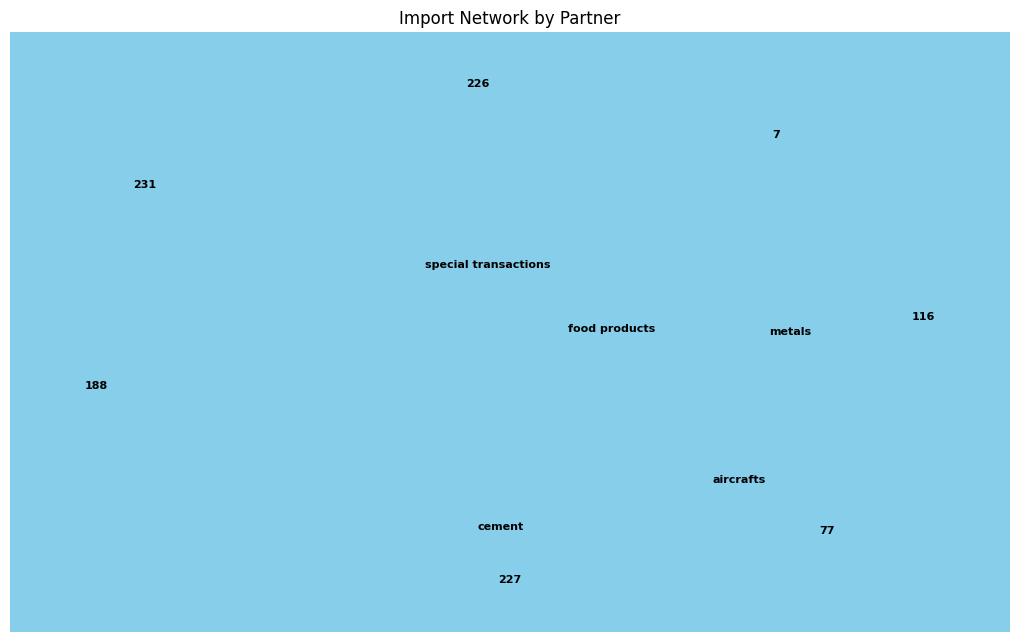

In [8]:
node_sizes = {}
for node in G.nodes():
    size = 0
    for partner in G.neighbors(node):
        size += float(top_10_imports.get((node, partner), 0))  # Sum imports for all partners
    node_sizes[node] = size * 100  # Scale as needed

# Plot the network
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True,
        node_size=[node_sizes[node] for node in G.nodes()],  # Use node_sizes dictionary
        node_color='skyblue', font_size=8, font_weight='bold',
        arrowsize=10, arrowstyle='->', edge_color='gray')
plt.title('Import Network by Partner')
plt.show()